In [1]:
import pandas as pd
import numpy as np

データを読み込む

In [2]:
df = pd.read_csv('./cbb19.csv')

In [3]:
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,...,35.3,25.9,61.4,43.4,36.3,30.4,72.0,7.0,E8,1.0
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0
2,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,33.2,24.0,58.0,45.0,30.8,29.9,73.6,11.2,E8,1.0
3,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,...,30.2,28.4,52.1,47.9,36.2,33.5,76.0,10.0,S16,1.0
4,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,27.5,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0


データクレンジング

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 23 columns):
TEAM          353 non-null object
CONF          353 non-null object
G             353 non-null int64
W             353 non-null int64
ADJOE         353 non-null float64
ADJDE         353 non-null float64
BARTHAG       353 non-null float64
EFG_O         353 non-null float64
EFG_D         353 non-null float64
TOR           353 non-null float64
TORD          353 non-null float64
ORB           353 non-null float64
DRB           353 non-null float64
FTR           353 non-null float64
FTRD          353 non-null float64
2P_O          353 non-null float64
2P_D          353 non-null float64
3P_O          353 non-null float64
3P_D          353 non-null float64
ADJ_T         353 non-null float64
WAB           353 non-null float64
POSTSEASON    68 non-null object
SEED          68 non-null float64
dtypes: float64(18), int64(2), object(3)
memory usage: 63.6+ KB


欠損値のある列("POSTSEASON"、"SEED")を除去する

In [5]:
df = df.fillna(0)

In [6]:
df = df.replace(df.loc[0:67, ['POSTSEASON', 'SEED']], 1)

In [7]:
df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,...,35.3,25.9,61.4,43.4,36.3,30.4,72.0,7.0,1,1.0
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,1,1.0
2,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,33.2,24.0,58.0,45.0,30.8,29.9,73.6,11.2,1,1.0
3,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,...,30.2,28.4,52.1,47.9,36.2,33.5,76.0,10.0,1,1.0
4,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,27.5,24.1,51.8,44.3,34.2,29.1,65.9,9.2,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,Alcorn St.,SWAC,27,10,89.0,112.6,0.0628,45.7,52.7,24.1,...,30.5,36.5,45.0,55.3,31.3,32.1,67.1,-16.7,0,0.0
349,New Hampshire,AE,27,5,83.7,106.1,0.0613,44.0,51.5,18.4,...,21.9,38.0,39.4,52.1,32.6,33.6,67.1,-20.2,0,0.0
350,Chicago St.,WAC,30,3,88.5,117.3,0.0380,44.2,57.8,22.5,...,33.1,33.9,43.5,57.9,30.7,38.5,71.9,-20.9,0,0.0
351,Delaware St.,MEAC,29,6,84.3,112.2,0.0358,40.0,52.4,19.0,...,25.5,39.2,37.7,52.6,29.0,34.7,71.6,-21.7,0,0.0


In [8]:
#df = df.drop(["POSTSEASON", "SEED"], axis=1)

In [9]:
ser_ratio = df['W'] / df['G']

In [10]:
df['ratio'] = ser_ratio

In [11]:
df.corr()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,ratio
G,1.000000,0.668788,0.640437,-0.634291,0.707243,0.317408,-0.498786,-0.316186,0.178514,0.285768,...,-0.213699,0.324457,-0.480759,0.164477,-0.337074,-0.054908,0.695400,0.538860,0.538860,0.507412
W,0.668788,1.000000,0.747631,-0.684400,0.791463,0.587550,-0.647509,-0.457309,0.233868,0.319706,...,-0.260970,0.569114,-0.567875,0.360899,-0.511362,-0.032242,0.901533,0.631103,0.631103,0.977414
ADJOE,0.640437,0.747631,1.000000,-0.568744,0.875756,0.698596,-0.391780,-0.575551,-0.029380,0.297432,...,-0.395675,0.637682,-0.357586,0.471384,-0.285562,0.020840,0.852475,0.555652,0.555652,0.693909
ADJDE,-0.634291,-0.684400,-0.568744,1.000000,-0.868742,-0.231538,0.822663,0.224042,-0.263413,-0.263516,...,0.176524,-0.297216,0.741785,-0.031037,0.622482,0.147413,-0.832084,-0.520360,-0.520360,-0.622331
BARTHAG,0.707243,0.791463,0.875756,-0.868742,1.000000,0.513541,-0.664659,-0.451669,0.125869,0.309525,...,-0.330788,0.521902,-0.595919,0.270415,-0.504589,-0.067080,0.942022,0.580775,0.580775,0.731502
EFG_O,0.317408,0.587550,0.698596,-0.231538,0.513541,1.000000,-0.181070,-0.359249,-0.123660,-0.112229,...,-0.421188,0.875997,-0.158161,0.731298,-0.141289,0.023519,0.514331,0.347216,0.347216,0.599316
EFG_D,-0.498786,-0.647509,-0.391780,0.822663,-0.664659,-0.181070,1.000000,0.127329,-0.080295,-0.254627,...,0.118046,-0.229701,0.892697,-0.034338,0.766802,0.124487,-0.686450,-0.461639,-0.461639,-0.615129
TOR,-0.316186,-0.457309,-0.575551,0.224042,-0.451669,-0.359249,0.127329,1.000000,0.072927,0.195409,...,0.390021,-0.275345,0.107075,-0.321983,0.104359,-0.025875,-0.439652,-0.281734,-0.281734,-0.449095
TORD,0.178514,0.233868,-0.029380,-0.263413,0.125869,-0.123660,-0.080295,0.072927,1.000000,0.181559,...,0.390806,-0.042459,-0.028445,-0.176486,-0.136812,0.001099,0.173041,0.133374,0.133374,0.226335
ORB,0.285768,0.319706,0.297432,-0.263516,0.309525,-0.112229,-0.254627,0.195409,0.181559,1.000000,...,0.174411,-0.023534,-0.246107,-0.182026,-0.167965,-0.006565,0.358145,0.225536,0.225536,0.291930


In [12]:
df.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,ratio
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,...,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,31.745042,17.113314,103.335977,103.336261,0.493214,50.600850,50.774504,18.606516,18.523513,28.245892,...,33.202550,50.060057,50.233994,34.287819,34.415864,69.168555,-7.783569,0.192635,0.192635,0.532116
std,2.514195,6.374993,7.020019,6.452597,0.253006,2.938629,2.752896,2.066711,2.092719,3.938373,...,5.080133,3.362801,3.122286,2.537098,2.336075,2.694397,7.120550,0.394928,0.394928,0.173926
min,26.000000,3.000000,83.700000,85.200000,0.034600,40.000000,42.500000,13.500000,13.300000,15.900000,...,21.800000,37.700000,40.700000,27.900000,27.900000,60.700000,-23.400000,0.000000,0.000000,0.100000
25%,30.000000,12.000000,98.600000,98.700000,0.281400,48.800000,48.900000,17.200000,17.100000,25.400000,...,29.700000,47.700000,48.300000,32.400000,32.900000,67.300000,-13.100000,0.000000,0.000000,0.406250
50%,31.000000,17.000000,103.100000,104.000000,0.476200,50.500000,50.900000,18.500000,18.300000,28.300000,...,32.700000,50.300000,50.200000,34.200000,34.400000,69.000000,-8.600000,0.000000,0.000000,0.531250
75%,33.000000,21.000000,107.700000,107.800000,0.689300,52.800000,52.600000,19.800000,19.800000,31.000000,...,36.400000,52.200000,52.200000,36.000000,35.900000,70.800000,-3.100000,0.000000,0.000000,0.655172
max,39.000000,35.000000,123.400000,119.200000,0.974400,59.000000,59.300000,25.100000,24.700000,38.700000,...,54.000000,61.400000,61.200000,42.400000,41.800000,79.100000,11.200000,1.000000,1.000000,0.937500


データ加工

カテゴリ変数を二値化する

In [13]:
df = pd.get_dummies(df, columns=['CONF', 'POSTSEASON', 'SEED'])

In [14]:
df.head()

,TEAM,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,...,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC,POSTSEASON_0,POSTSEASON_1,SEED_0.0,SEED_1.0
0,Gonzaga,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,19.0,...,0,0,0,0,0,1,0,1,0,1
1,Virginia,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,...,0,0,0,0,0,0,0,1,0,1
2,Duke,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,19.4,...,0,0,0,0,0,0,0,1,0,1
3,North Carolina,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,18.3,...,0,0,0,0,0,0,0,1,0,1
4,Michigan,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,18.0,...,0,0,0,0,0,0,0,1,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 57 columns):
TEAM            353 non-null object
G               353 non-null int64
W               353 non-null int64
ADJOE           353 non-null float64
ADJDE           353 non-null float64
BARTHAG         353 non-null float64
EFG_O           353 non-null float64
EFG_D           353 non-null float64
TOR             353 non-null float64
TORD            353 non-null float64
ORB             353 non-null float64
DRB             353 non-null float64
FTR             353 non-null float64
FTRD            353 non-null float64
2P_O            353 non-null float64
2P_D            353 non-null float64
3P_O            353 non-null float64
3P_D            353 non-null float64
ADJ_T           353 non-null float64
WAB             353 non-null float64
ratio           353 non-null float64
CONF_A10        353 non-null uint8
CONF_ACC        353 non-null uint8
CONF_AE         353 non-null uint8
CONF_ASun       35

学習用と評価用にデータを分割する

In [16]:
# 評価用データとして元データからランダムに30件を抽出
df_test = df.sample(n=30, random_state=0)

In [17]:
# 学習用データは元データから評価用データを除いたもの
df_train = df[~df['TEAM'].isin(df_test['TEAM'])]

データを目的変数と説明変数に分離する

In [18]:
# df_xxx_Xは目的変数を除去したデータ
df_train_X = df_train.drop(['ratio'], axis=1)
df_test_X = df_test.drop(['ratio'], axis=1)
# df_xxx_yは目的変数のみのデータ
df_train_y = df_train['ratio']
df_test_y = df_test['ratio']

In [19]:
# チーム名だけ保持しておく
df_train_team_X = df_train_X['TEAM']
df_test_team_X = df_test_X['TEAM']

オブジェクト型のデータを除去する

In [20]:
df_train_X = df_train_X.drop(['TEAM','WAB', 'W','POSTSEASON_0', 'SEED_0.0'], axis=1)
df_test_X = df_test_X.drop(['TEAM', 'WAB', 'W','POSTSEASON_0', 'SEED_0.0'], axis=1)
#df_train_X = df_train_X.drop(['TEAM'], axis=1)
#df_test_X = df_test_X.drop(['TEAM'], axis=1)

標準化する

In [21]:
from sklearn.preprocessing import StandardScaler

# 学習用データ
X_sc_df = StandardScaler()

# 元データからパラメータ(平均、分散)を算出する
X_sc_df.fit(df_train_X)
# 元データを変換
df_train_X_std = X_sc_df.transform(df_train_X)

# 評価用データ
X_sc_df = StandardScaler()

# 元データからパラメータ(平均、分散)を算出する
X_sc_df.fit(df_test_X)
# 元データを変換
df_test_X_std = X_sc_df.transform(df_test_X)

# 目的変数は元データが一列しかないので標準化の式に当てはめて変換
df_train_y_std = (df_train_y - df_train_y.mean())/df_train_y.std()
df_test_y_std = (df_test_y - df_test_y.mean())/df_test_y.std()

重回帰分析のためのモデル作成、実行

In [22]:
from sklearn.linear_model import LinearRegression

データ分割

In [23]:
from sklearn.model_selection import train_test_split
linreg = LinearRegression()

In [24]:
#学習データと予測データに分割(学習データ:予測データ=7:3)
#X_train,X_pred,y_train,y_pred = train_test_split(X_learn_std,y_learn_std,random_state=1,test_size=0.3)
X_train_data,X_pred_data,y_train_data,y_pred_data = train_test_split(df_train_X_std,df_train_y_std,test_size=0.3)

モデルの作成と実行

In [25]:
# 線形回帰モデルへ当てはめる
linreg.fit(X_train_data,y_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# 予測実行
pred_result = linreg.predict(X_pred_data)

In [27]:
# 予測結果を逆標準化
# 予測値
y_pred_data.predict = pred_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = y_pred_data * df_train_y.std() + df_train_y.mean()

予実結果の可視化

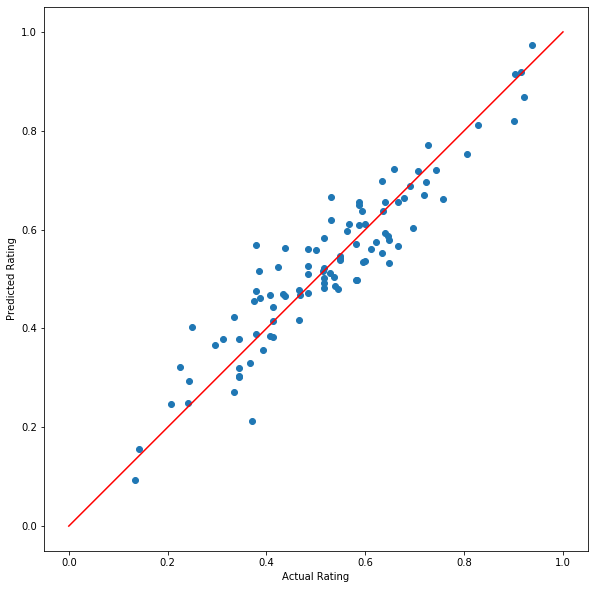

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(y_pred_val, y_pred_data.predict)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 2)
y=x
plt.plot(x,y,color="red")

誤差の計測

In [29]:
rmse = np.sqrt(sum((y_pred_val - y_pred_data.predict) ** 2) / len(y_pred_val))
print("RMSE = ", rmse)

RMSE =  0.06282995768675814


In [30]:
print(df_train_X)

      G  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB  ...  \
0    37  123.4   89.9   0.9744   59.0   44.2  14.9  19.0  31.5  26.8  ...   
1    38  123.0   89.9   0.9736   55.2   44.7  14.7  17.5  30.4  25.4  ...   
2    38  118.9   89.2   0.9646   53.6   45.0  17.5  19.4  35.6  29.5  ...   
3    36  120.1   91.4   0.9582   52.9   48.9  17.2  18.3  35.3  22.8  ...   
4    37  114.6   85.6   0.9665   51.6   44.1  13.9  18.0  24.7  24.8  ...   
..   ..    ...    ...      ...    ...    ...   ...   ...   ...   ...  ...   
348  27   89.0  112.6   0.0628   45.7   52.7  24.1  18.2  30.1  31.5  ...   
349  27   83.7  106.1   0.0613   44.0   51.5  18.4  16.9  21.5  24.7  ...   
350  30   88.5  117.3   0.0380   44.2   57.8  22.5  16.7  22.1  33.9  ...   
351  29   84.3  112.2   0.0358   40.0   52.4  19.0  18.9  27.8  31.6  ...   
352  30   85.7  114.4   0.0346   43.5   54.4  20.7  19.0  22.8  31.7  ...   

     CONF_SB  CONF_SC  CONF_SEC  CONF_SWAC  CONF_Slnd  CONF_Sum  CONF_WAC  

説明変数の影響度を確認

CONF_BSky    0.088013
CONF_NEC     0.090308
CONF_P12    -0.097476
CONF_MEAC    0.112096
CONF_Amer   -0.113702
CONF_B12    -0.120607
ADJDE        0.128144
ORB          0.134530
DRB         -0.135970
CONF_Slnd    0.143551
TOR         -0.158011
CONF_SEC    -0.162172
CONF_B10    -0.165601
CONF_ACC    -0.173239
ADJOE        0.257063
TORD         0.258536
3P_D         0.268635
BARTHAG      0.405930
2P_D         0.427473
EFG_D       -0.994303
Name: Coef, dtype: float64

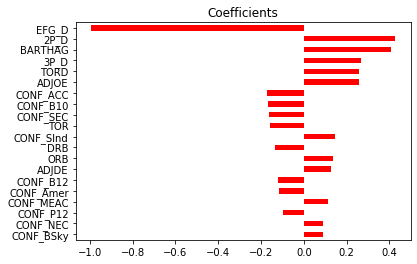

In [31]:
coef_df = pd.DataFrame({"Coef":linreg.coef_, "Coef_abs":np.abs(linreg.coef_)})
coef_df.index = df_train_X.columns
coef_df = coef_df.sort_values(by="Coef_abs")
coef_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_df["Coef"].tail(20)

全学習データに対して重回帰分析を実施する

In [32]:
linreg_all = LinearRegression()

In [33]:
#lr_model_all = linreg_all.fit(X_learn_std,y_learn_std)
linreg_all.fit(df_train_X_std,df_train_y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_test_result = linreg_all.predict(df_test_X_std)

CONF_BSth    0.088047
CONF_Amer   -0.090132
CONF_MEAC    0.090865
2P_O         0.091165
CONF_P12    -0.091664
CONF_BSky    0.094663
3P_D         0.101557
DRB         -0.142233
ORB          0.147279
CONF_Slnd    0.151161
CONF_B12    -0.151829
CONF_SEC    -0.158639
TOR         -0.161797
CONF_B10    -0.180089
CONF_ACC    -0.180564
2P_D         0.233419
ADJOE        0.243298
TORD         0.252161
BARTHAG      0.360866
EFG_D       -0.672347
Name: Coef, dtype: float64

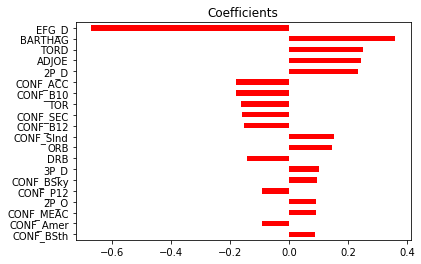

In [35]:
coef_all_df = pd.DataFrame({"Coef":linreg_all.coef_, "Coef_abs":np.abs(linreg_all.coef_)})
coef_all_df.index = df_train_X.columns
coef_all_df = coef_all_df.sort_values(by="Coef_abs")
coef_all_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_all_df["Coef"].tail(20)

In [36]:
# 予測結果を逆標準化
df_test_y.predict = y_test_result * df_test_y.std() + df_test_y.mean()
y_test_result_val = df_test_y

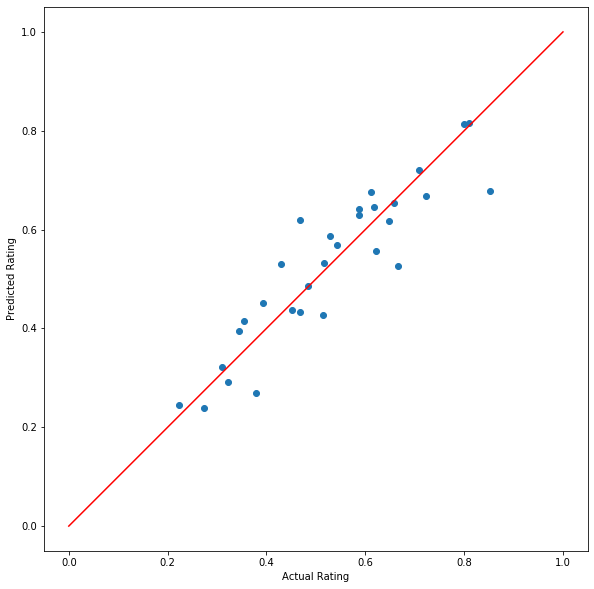

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(y_test_result_val, df_test_y.predict)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 2)
y=x
plt.plot(x,y,color="red")

In [38]:
rmse = np.sqrt(sum((y_test_result_val - df_test_y.predict) ** 2) / len(y_test_result_val))
print("RMSE = ", rmse)

RMSE =  0.06798139042082335


In [39]:
print(df_train_X)

      G  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB  ...  \
0    37  123.4   89.9   0.9744   59.0   44.2  14.9  19.0  31.5  26.8  ...   
1    38  123.0   89.9   0.9736   55.2   44.7  14.7  17.5  30.4  25.4  ...   
2    38  118.9   89.2   0.9646   53.6   45.0  17.5  19.4  35.6  29.5  ...   
3    36  120.1   91.4   0.9582   52.9   48.9  17.2  18.3  35.3  22.8  ...   
4    37  114.6   85.6   0.9665   51.6   44.1  13.9  18.0  24.7  24.8  ...   
..   ..    ...    ...      ...    ...    ...   ...   ...   ...   ...  ...   
348  27   89.0  112.6   0.0628   45.7   52.7  24.1  18.2  30.1  31.5  ...   
349  27   83.7  106.1   0.0613   44.0   51.5  18.4  16.9  21.5  24.7  ...   
350  30   88.5  117.3   0.0380   44.2   57.8  22.5  16.7  22.1  33.9  ...   
351  29   84.3  112.2   0.0358   40.0   52.4  19.0  18.9  27.8  31.6  ...   
352  30   85.7  114.4   0.0346   43.5   54.4  20.7  19.0  22.8  31.7  ...   

     CONF_SB  CONF_SC  CONF_SEC  CONF_SWAC  CONF_Slnd  CONF_Sum  CONF_WAC  